In [ ]:
import jax
import numpy as np

from ho_stray_field.integrate import sinc_quad_1_over_sqrtx
jax.config.update("jax_enable_x64", True)

In [2]:
def exp_sum_err(x, omega, alpha):
    return np.abs(x - np.sum(omega * x[:, None] ** 2 * np.exp(-alpha * x[:, None] ** 2), axis=1))

dtype = np.float128
omega, alpha = sinc_quad_1_over_sqrtx(50, c0=1.9)

xs = np.logspace(-3, 1, 20000, dtype=dtype)
errors50 = exp_sum_err(xs, omega, alpha)

omega, alpha = sinc_quad_1_over_sqrtx(100, c0=1.9)
errors100 = exp_sum_err(xs, omega, alpha)

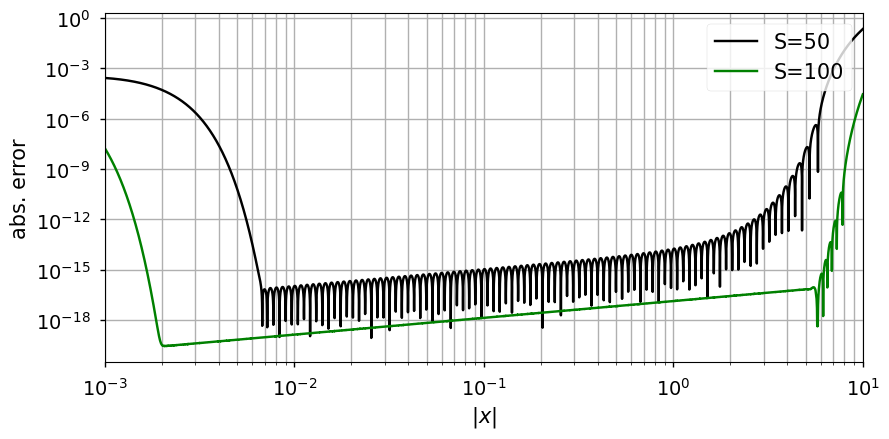

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style

with style.context("seaborn-v0_8-notebook"):
    plt.figure(figsize=(9, 4.5))
    plt.plot(xs, errors50, color="k", label="S=50")
    plt.plot(xs, errors100, color="green", label="S=100")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(which="both")
    plt.ylabel("abs. error", fontsize=15)
    plt.xlabel("$|x|$", fontsize=15)
    plt.xlim((1e-3, 10))
    plt.legend(fontsize=15, loc=1)
    plt.gca().tick_params(axis='both', which='major', labelsize=14)
    plt.tight_layout()
    plt.gcf().savefig("GSapprox.pdf")